# TelcoChurnPrediction
---

## İş Problemi
- Şirketi terk edecek müşterileri tahmin edebilecek bir makine öğrenmesi modeli geliştirilmesi beklenmektedir. 
---

## Veri Seti Hikayesi
- Telco müşterikaybıverileri, üçüncü çeyrekte Kaliforniya'daki 7043 müşteriye ev telefonu ve İnternet hizmetleri sağlayan hayali bir telekom şirketi hakkında bilgi içerir. Hangi müşterilerin hizmetlerinden ayrıldığını, kaldığını veya hizmete kaydolduğunu gösterir.


 - **CustomerId:** Müşteri İd’si
 - **Gender:** Cinsiyet
 - **SeniorCitizen:** Müşterinin yaşlı olup olmadığı(1, 0)
 - **Partner:** Müşterinin bir ortağı olup olmadığı(Evet, Hayır)
 - **Dependents:** Müşterinin bakmakla yükümlü olduğu kişiler olup olmadığı(Evet, Hayır) 
 - **Tenure:** Müşterinin şirkette kaldığı ay sayısı 
 - **PhoneService:** Müşterinin telefon hizmeti olup olmadığı(Evet, Hayır)
 - **MultipleLines:** Müşterinin birden fazla hattı olup olmadığı(Evet, Hayır, Telefon hizmeti yok)
 - **InternetService:** Müşterinin internet servis sağlayıcısı(DSL, Fiber optik, Hayır)
 - **OnlineSecurity:** Müşterinin çevrimiçi güvenliğinin olup olmadığı(Evet, Hayır, İnternet hizmetiyok)
 - **OnlineBackup:** Müşterinin online yedeğinin olup olmadığı(Evet, Hayır, İnternet hizmetiyok)
 - **DeviceProtection:** Müşterinin cihaz korumasına sahip olup olmadığı(Evet, Hayır, İnternet hizmetiyok)
 - **TechSupport:** Müşterinin teknik destek alıp almadığı(Evet, Hayır, İnternet hizmetiyok)
 - **StreamingTV:** Müşterinin TV yayını olup olmadığı(Evet, Hayır, İnternet hizmetiyok)
 - **StreamingMovies:** Müşterinin film akışı olup olmadığı(Evet, Hayır, İnternet hizmetiyok)
 - **Contract:** Müşterinin sözleşme süresi(Aydan aya, Bir yıl, İkiyıl)
 - **PaperlessBilling:** Müşterinin kağıtsız faturası olup olmadığı(Evet, Hayır)
 - **PaymentMethod:** Müşterinin ödeme yöntemi(Elektronikçek, Posta çeki, Banka havalesi(otomatik), Kredikartı(otomatik))
 - **MonthlyCharges:** Müşteriden aylık olarak tahsil edilen tutar 
 - **TotalCharges:** Müşteriden tahsil edilen toplam tutar 
 - **Churn:** Müşterinin kullanıp kullanmadığı(Evet veyaHayır)
 ---
 


### Görev 1 : Keşifçi Veri Analizi
---

In [1]:

import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,roc_auc_score,confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate, validation_curve
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, export_graphviz, export_text


In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)

In [3]:
def load():
    data = pd.read_csv('datasets\Telco-Customer-Churn.csv')
    return data

df = load()

In [4]:
# Veri Setini inceleyelim..
print("##################### Shape #####################")
print(df.shape)
print("##################### Types #####################")
print(df.dtypes)
print("##################### Head #####################")
print(df.head())
print("##################### Tail #####################")
print(df.tail())
print("##################### NA #####################")
print(df.isnull().sum())
print("##################### Describe ##############")
print(df.describe([0.10,0.25,0.50,0.75,0.90,0.95,0.99]).T)

##################### Shape #####################
(7043, 21)
##################### Types #####################
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object
##################### Head #####################
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes  

In [5]:
#TotalCharges  : toplam tutar değişkeni. Object tipinde. Nümerik değişkene çevrilmeli.
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors = 'coerce') 
#pd.to_numeric TotalCharges değişkenindeki tüm değerleri sayısal formata dönüştürecektir.
#  errors='coerce' parametresi, herhangi bir dönüştürme hatası oluşursa bu değerleri NaN olarak işaretleyecektir.

In [6]:
df.info() # kontrol edelim.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
# Adım 1: Numerik ve kategorik değişkenleri yakalayınız.
# cat_th=10 Değişkenin sınıfları 10'dan azsa bu değişken kategorik olarak ele al.
# car_th=20 ise, bir değişkenin farklı değerleri 10 veya daha azsa bu değişken sayısal olarak ele al.
def grab_col_names(dataframe, cat_th=10, car_th=20):
    """

    Veri setindeki kategorik, numerik ve kategorik fakat kardinal değişkenlerin isimlerini verir.
    Not: Kategorik değişkenlerin içerisine numerik görünümlü kategorik değişkenler de dahildir.

    Parameters
    ------
        dataframe: dataframe
                Değişken isimleri alınmak istenilen dataframe
        cat_th: int, optional
                numerik fakat kategorik olan değişkenler için sınıf eşik değeri
        car_th: int, optinal
                kategorik fakat kardinal değişkenler için sınıf eşik değeri

    Returns
    ------
        cat_cols: list
                Kategorik değişken listesi
        num_cols: list
                Numerik değişken listesi
        cat_but_car: list
                Kategorik görünümlü kardinal değişken listesi

    Examples
    ------
        import seaborn as sns
        df = sns.load_dataset("iris")
        print(grab_col_names(df))


    Notes
    ------
        cat_cols + num_cols + cat_but_car = toplam değişken sayısı
        num_but_cat, cat_cols'un içerisinde.
        Return olan 3 liste toplamı toplam değişken sayısına eşittir: cat_cols + num_cols + cat_but_car = değişken sayısı
        num_but_cat sadece raporlama için verilmiştir.

    """

    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}") #tuple'ın ilk elemanı olan satır sayısını belirtir.
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')
    return cat_cols, num_cols, cat_but_car

cat_cols, num_cols, cat_but_car = grab_col_names(df)

#7043 Gözlem var. 21 Değişken ,17 tane kategorik değişken, 2 tane numarik değişken, categorik ama kardinal olan 2 değişken, Numarik ama cardinal olan 1 değişken

Observations: 7043
Variables: 21
cat_cols: 17
num_cols: 3
cat_but_car: 1
num_but_cat: 1


In [8]:
cat_cols

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn',
 'SeniorCitizen']

In [9]:
num_cols

['tenure', 'MonthlyCharges', 'TotalCharges']

In [10]:
cat_but_car # Veri setinden çıkartılabilir.

['customerID']

In [11]:
#cat_but_car = [col for col in cat_but_car if col not in "customerID"] - Eğer değişkenimizin içinden çıkartmak istediğimizde bu şekilde yapabiliriz.
#cat_but_car

In [12]:
# Adım 2: Gerekli düzenlemeleri yapınız. (Tip hatası olan değişkenler gibi)

df.info()  # son duruma bakalım. TotalCharges ve bağımlı değişkenimiz Churn için Yukarıda gerekli düzeltme işmeli yapmıştık.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [13]:
# Bağımlı değişken olan Churn değerini 1 ve 0 olarak değiştirmeliyiz.
df["Churn"] = df["Churn"].apply(lambda x : 1 if x == "Yes" else 0)


In [14]:
#Adım 3:  Numerik ve kategorik değişkenlerin veri içindeki dağılımını gözlemleyiniz.
#Numarik değişkenlerin dağılımı
def num_summary(df, numerical_col, plot=False):
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    print(df[numerical_col].describe(quantiles).T)

    if plot:
        df[numerical_col].hist(bins=20)
        plt.xlabel(numerical_col)
        plt.title(numerical_col)
        plt.show()
        
        

count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
5%          1.000000
10%         2.000000
20%         6.000000
30%        12.000000
40%        20.000000
50%        29.000000
60%        40.000000
70%        50.000000
80%        60.000000
90%        69.000000
95%        72.000000
99%        72.000000
max        72.000000
Name: tenure, dtype: float64


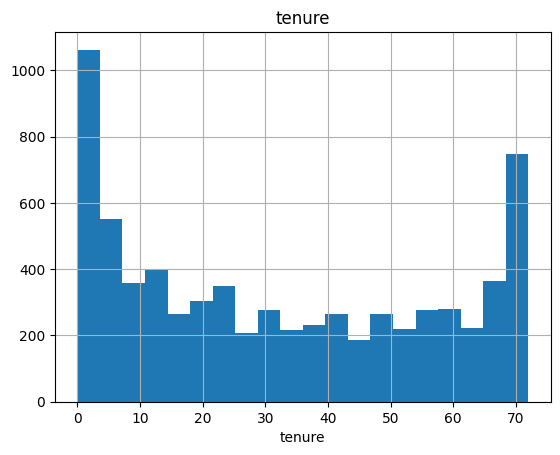

count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
5%         19.650000
10%        20.050000
20%        25.050000
30%        45.850000
40%        58.830000
50%        70.350000
60%        79.100000
70%        85.500000
80%        94.250000
90%       102.600000
95%       107.400000
99%       114.729000
max       118.750000
Name: MonthlyCharges, dtype: float64


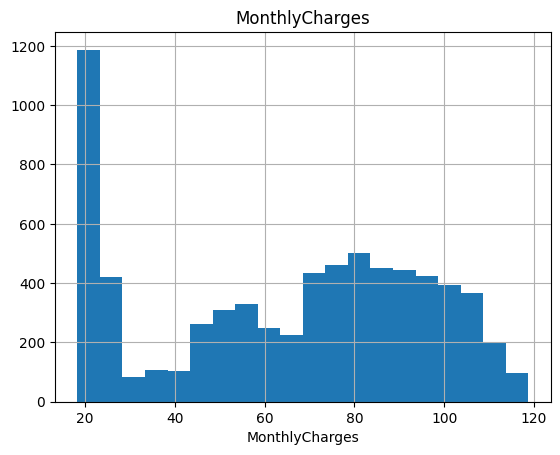

count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
5%         49.605000
10%        84.600000
20%       267.070000
30%       551.995000
40%       944.170000
50%      1397.475000
60%      2048.950000
70%      3141.130000
80%      4475.410000
90%      5976.640000
95%      6923.590000
99%      8039.883000
max      8684.800000
Name: TotalCharges, dtype: float64


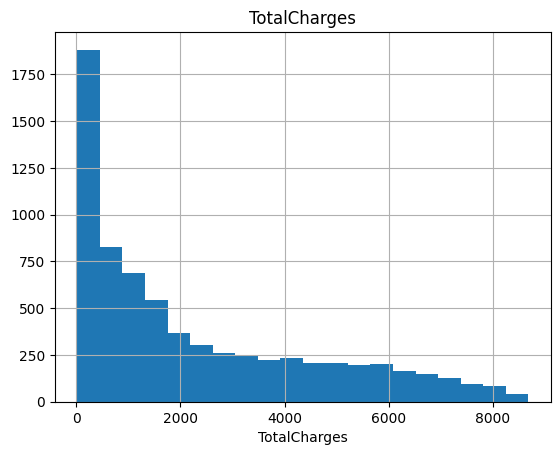

In [15]:
for col in num_cols:
    num_summary(df, col, plot=True)

In [16]:
#Kategorik değişkenlerin dağılımı

def cat_summary(df, col_name, plot=False):
    print(pd.DataFrame({col_name: df[col_name].value_counts(),
                        "Ratio": 100 * df[col_name].value_counts() / len(df)}))
    print("###################################")
    if plot:
        sns.countplot(x=df[col_name], data=df)
        plt.show()

        gender     Ratio
Male      3555  50.47565
Female    3488  49.52435
###################################


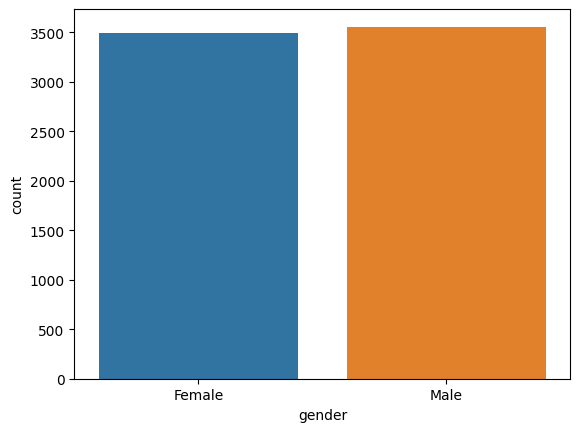

     Partner     Ratio
No      3641  51.69672
Yes     3402  48.30328
###################################


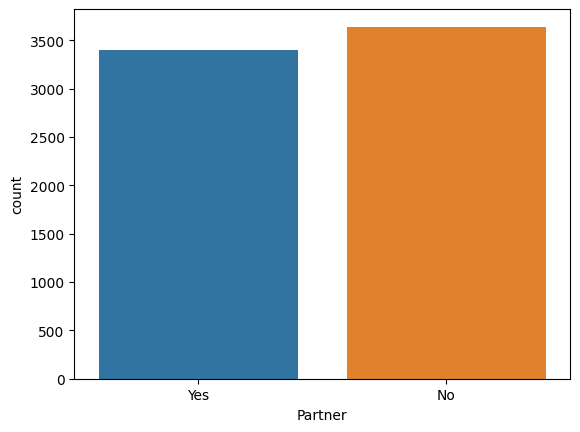

     Dependents      Ratio
No         4933  70.041176
Yes        2110  29.958824
###################################


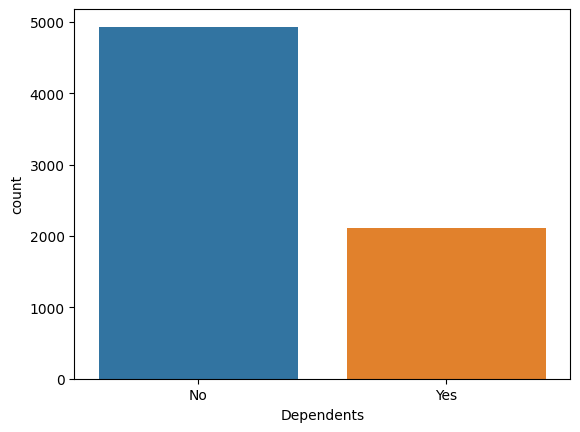

     PhoneService      Ratio
Yes          6361  90.316626
No            682   9.683374
###################################


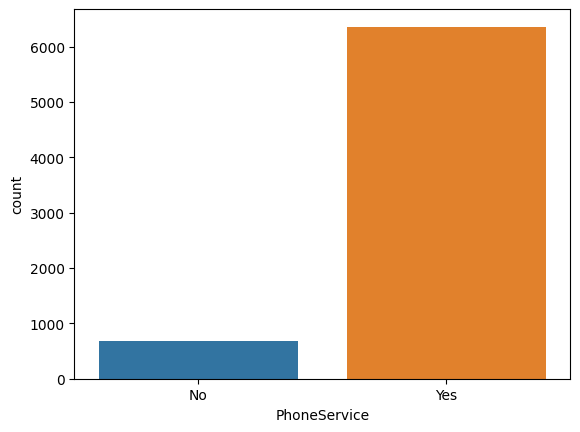

                  MultipleLines      Ratio
No                         3390  48.132898
Yes                        2971  42.183729
No phone service            682   9.683374
###################################


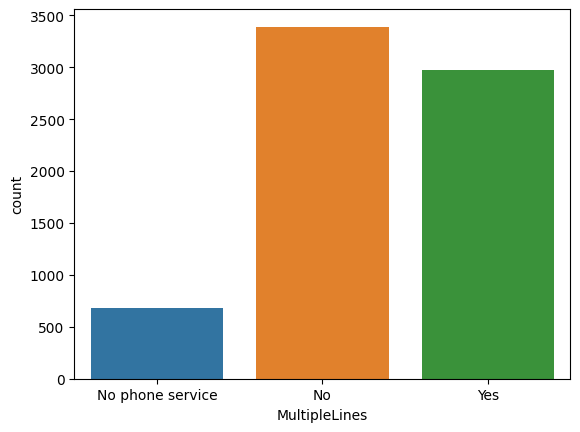

             InternetService      Ratio
Fiber optic             3096  43.958540
DSL                     2421  34.374556
No                      1526  21.666903
###################################


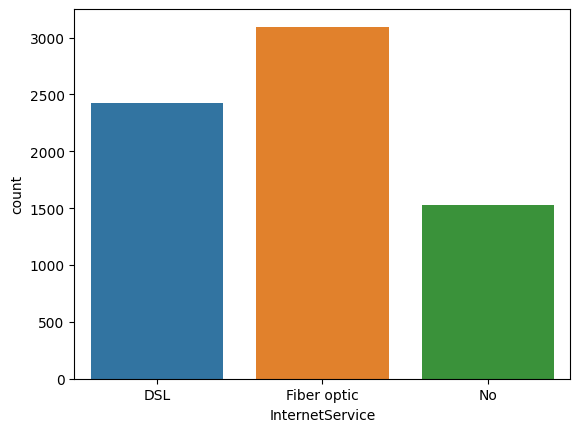

                     OnlineSecurity      Ratio
No                             3498  49.666335
Yes                            2019  28.666761
No internet service            1526  21.666903
###################################


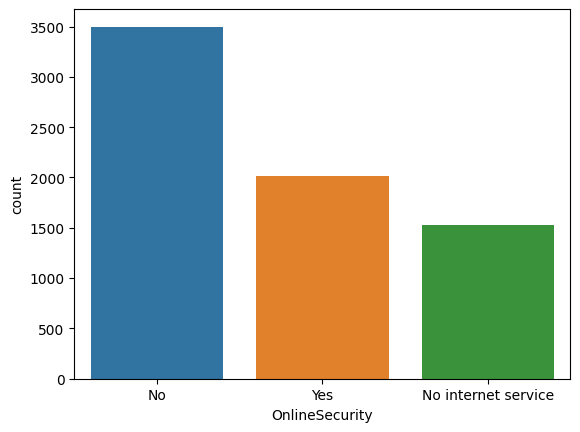

                     OnlineBackup      Ratio
No                           3088  43.844952
Yes                          2429  34.488144
No internet service          1526  21.666903
###################################


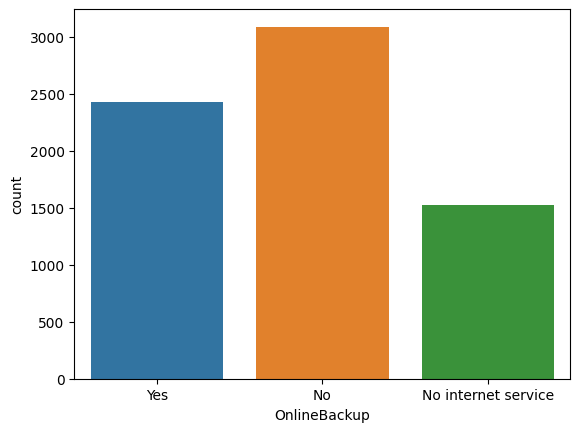

                     DeviceProtection      Ratio
No                               3095  43.944342
Yes                              2422  34.388755
No internet service              1526  21.666903
###################################


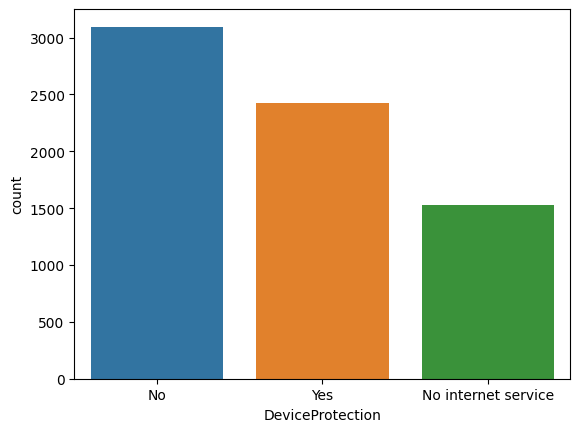

                     TechSupport      Ratio
No                          3473  49.311373
Yes                         2044  29.021724
No internet service         1526  21.666903
###################################


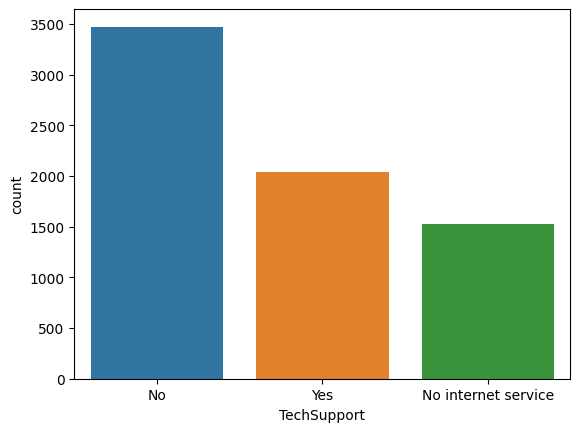

                     StreamingTV      Ratio
No                          2810  39.897771
Yes                         2707  38.435326
No internet service         1526  21.666903
###################################


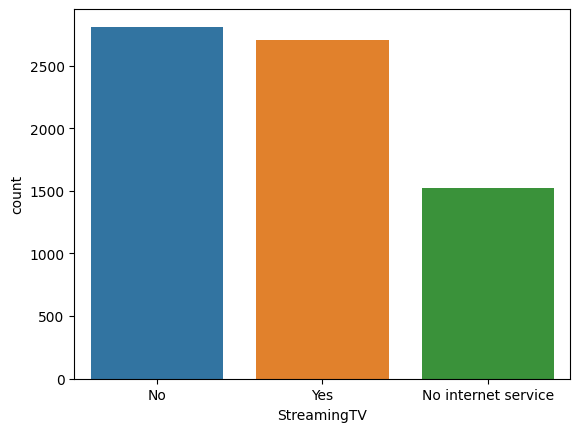

                     StreamingMovies      Ratio
No                              2785  39.542808
Yes                             2732  38.790288
No internet service             1526  21.666903
###################################


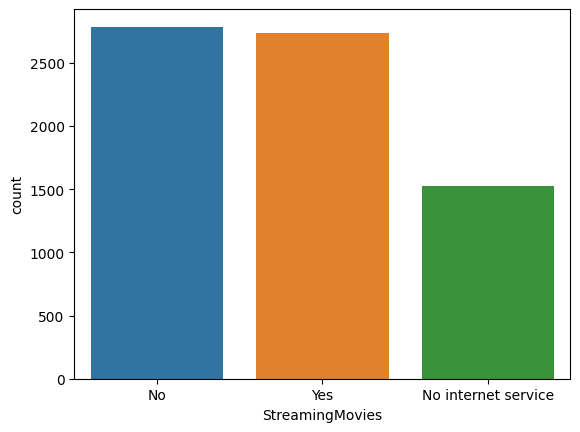

                Contract      Ratio
Month-to-month      3875  55.019168
Two year            1695  24.066449
One year            1473  20.914383
###################################


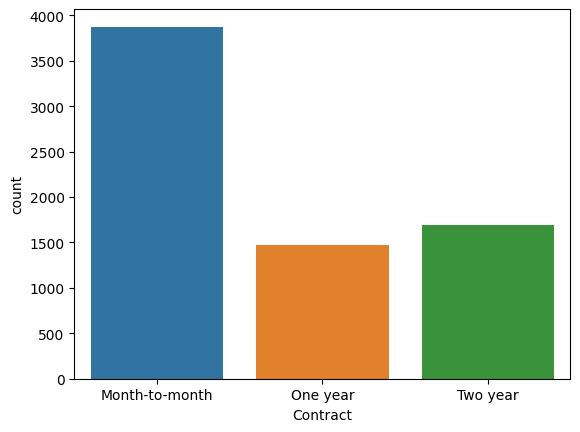

     PaperlessBilling      Ratio
Yes              4171  59.221922
No               2872  40.778078
###################################


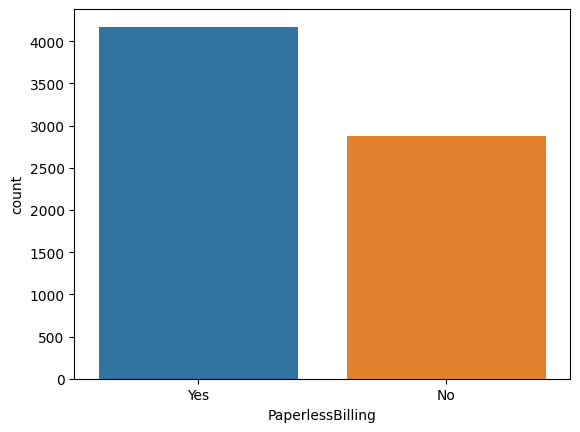

                           PaymentMethod      Ratio
Electronic check                    2365  33.579441
Mailed check                        1612  22.887974
Bank transfer (automatic)           1544  21.922476
Credit card (automatic)             1522  21.610109
###################################


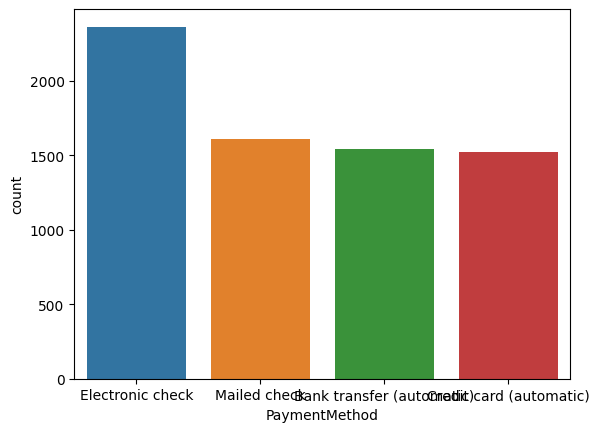

   Churn      Ratio
0   5174  73.463013
1   1869  26.536987
###################################


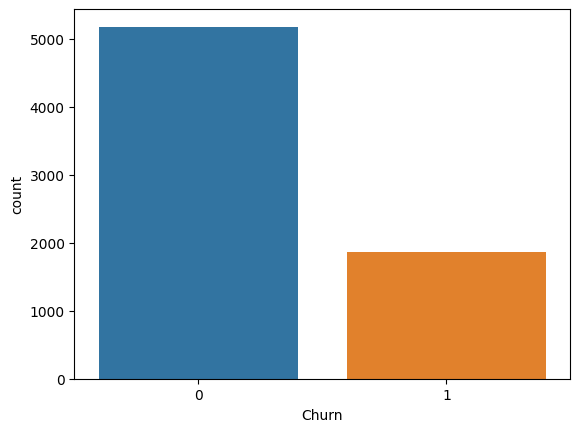

   SeniorCitizen      Ratio
0           5901  83.785319
1           1142  16.214681
###################################


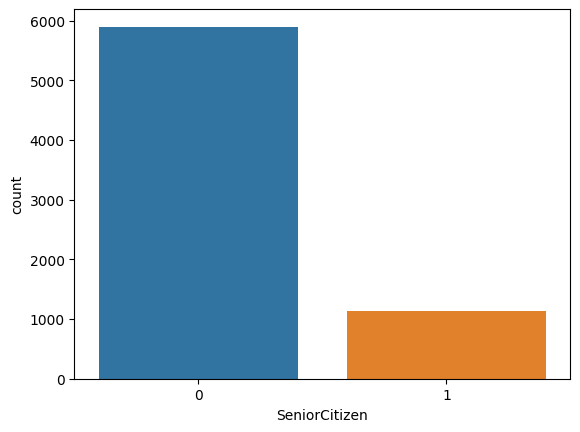

In [17]:
for col in cat_cols:
    cat_summary(df, col, plot=True)

- Gender, Partner : Kadın-erkek, evli-bekar oranları yaklaşık %50-%50 dağılmış
- Dependents : Toplam müşterilerin yalnızca %30'unun bakmakla yükümlü olduğu kişiler var.
- PhoneService : Müşterilerin %90'ı telefon hizmeti almaktadır.
- InternetService : Müşterilerin %80'i internet servisi almaktadır.
- OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport : İnternet servisi alanların çoğunluğunun çevrimiçi güvenlik hizmeti, online yedek hizmeti, cihaz koruma hizmeti ve teknik destek almadığını gözlemliyoruz.
- StreamingTV, StreamingMovies : İnternet servisi alanların yaklaşık %50'si TV ve film yayın hizmetlerini almakta.
- Contract : Müşterilerin çoğu(%55) aydan aya sözleşme yapıyor. 1 yıllık ve 2 yıllık sözleşmelerde yakın sayıda müşteri bulunmakta.
- SeniorCitizen : Veri setinin %16'sı yaşlı müşterilerden oluşmakta.
- Churn : Müşterilerin %26'sı platformdan ayrılmış

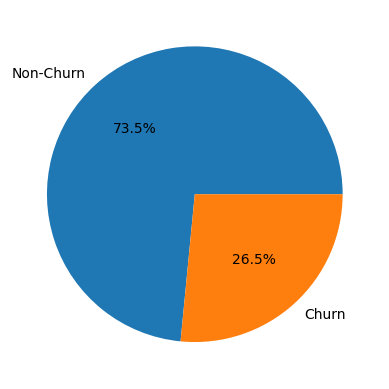

In [18]:
# Churn olup olamam durumlarına göz atalım.
Churn_ratio = df["Churn"].value_counts()
Churn_ratio_plt = [100*Churn_ratio[0]/(Churn_ratio[0]+Churn_ratio[1]), 
               100*Churn_ratio[1]/(Churn_ratio[0]+Churn_ratio[1])]
labels = ["Non-Churn", "Churn"]

plt.pie(Churn_ratio_plt, labels=labels, autopct='%1.1f%%')
plt.show()

In [19]:
#Adım 4: Kategorik değişkenler ile hedef değişken incelemesini yapınız. 
def target_summary_with_cat(dataframe, target, categorical_col):
    print(categorical_col)
    print(pd.DataFrame({"TARGET_MEAN": dataframe.groupby(categorical_col)[target].mean(),
                        "Count": dataframe[categorical_col].value_counts(),
                        "Ratio": 100 * dataframe[categorical_col].value_counts() / len(dataframe)}), end="\n\n\n")

In [20]:
for col in cat_cols:
    target_summary_with_cat(df, "Churn", col)

gender
        TARGET_MEAN  Count     Ratio
Female     0.269209   3488  49.52435
Male       0.261603   3555  50.47565


Partner
     TARGET_MEAN  Count     Ratio
No      0.329580   3641  51.69672
Yes     0.196649   3402  48.30328


Dependents
     TARGET_MEAN  Count      Ratio
No      0.312791   4933  70.041176
Yes     0.154502   2110  29.958824


PhoneService
     TARGET_MEAN  Count      Ratio
No      0.249267    682   9.683374
Yes     0.267096   6361  90.316626


MultipleLines
                  TARGET_MEAN  Count      Ratio
No                   0.250442   3390  48.132898
No phone service     0.249267    682   9.683374
Yes                  0.286099   2971  42.183729


InternetService
             TARGET_MEAN  Count      Ratio
DSL             0.189591   2421  34.374556
Fiber optic     0.418928   3096  43.958540
No              0.074050   1526  21.666903


OnlineSecurity
                     TARGET_MEAN  Count      Ratio
No                      0.417667   3498  49.666335
No internet ser

- gender : Kadın - Erkek Churn oranına baktığımızda herhangi bir farklılık yok.Eşit Dağılmış
- Partner : Evli olmayanlarda Churn ortlaması Bekarlara göre daha yüksek (0.32)
- Dependents : Birilerine bakmayanların Churn oranı daha yüksek
- PhoneService : Herhangi ayırıcı bir kırılım gözlemlemiyoruz.
- InternetService : fiber optic alanların daha fazla Churn olduğu gözüküyor.
- OnlineSecurity , OnlineBackup, DeviceProtection, TechSupport : Bu hizmetleri almayan müşterilerin churn oranı yüksek 
- Contract : Aylık aboneliği olan müşterilerin Churn oranı daha yüksek
- PaperlessBilling : Kağıtsız faturalandırmaya sahip olanların churn oranı daha yüksek
- PaymentMethod : ElectronicCheck kullanan müşteriler, diğer seçeneklere kıyasla platformdan daha fazla ayrılma eğiliminde
- SeniorCitizen : Yaşlı müşterilerde churn yüzdesi daha yüksektir

In [21]:
 #Numarik değişkenler ile hedef değişken incelemesini yapınız. 
def target_summary_with_num(df, target, numerical_col):
    print(df.groupby(target).agg({numerical_col: "mean"}), end="\n\n\n")
for col in num_cols:
    target_summary_with_num(df, "Churn", col)

          tenure
Churn           
0      37.569965
1      17.979133


       MonthlyCharges
Churn                
0           61.265124
1           74.441332


       TotalCharges
Churn              
0       2555.344141
1       1531.796094




In [22]:
corr = df[num_cols].corr()
corr

,tenure,MonthlyCharges,TotalCharges
tenure,1.00000,0.247900,0.825880
MonthlyCharges,0.24790,1.000000,0.651065
TotalCharges,0.82588,0.651065,1.000000


C:\Users\Gizem\AppData\Local\Temp\ipykernel_3652\2203909619.py:1: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corrwith(df["Churn"]).sort_values(ascending=False)
C:\Users\Gizem\AppData\Local\Temp\ipykernel_3652\2203909619.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_df = df.corr()


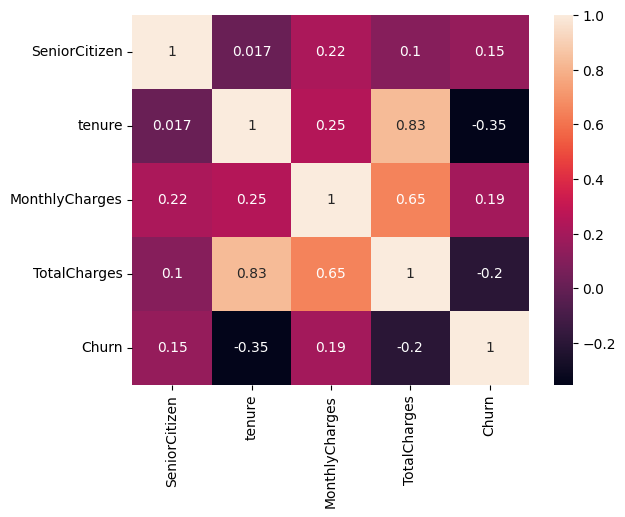

In [23]:
df.corrwith(df["Churn"]).sort_values(ascending=False)
corr_df = df.corr()

sns.heatmap(corr_df, annot=True, xticklabels=corr_df.columns, yticklabels=corr_df.columns)
plt.show()

In [24]:
#Adım 5: Aykırı gözlem var mı inceleyiniz.
df.describe([0.10,0.25,0.50,0.75,0.90,0.95,0.99]).T     # aykır gözlem yok gibi ama bunlara fonksiyonumuz ile bakalım.


,count,mean,std,min,10%,25%,50%,75%,90%,95%,99%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.00,0.00,0.000,0.0000,1.00,1.00,1.000,1.00
tenure,7043.0,32.371149,24.559481,0.00,2.00,9.00,29.000,55.0000,69.00,72.00,72.000,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,20.05,35.50,70.350,89.8500,102.60,107.40,114.729,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,84.60,401.45,1397.475,3794.7375,5976.64,6923.59,8039.883,8684.80
Churn,7043.0,0.265370,0.441561,0.00,0.00,0.00,0.000,1.0000,1.00,1.00,1.000,1.00


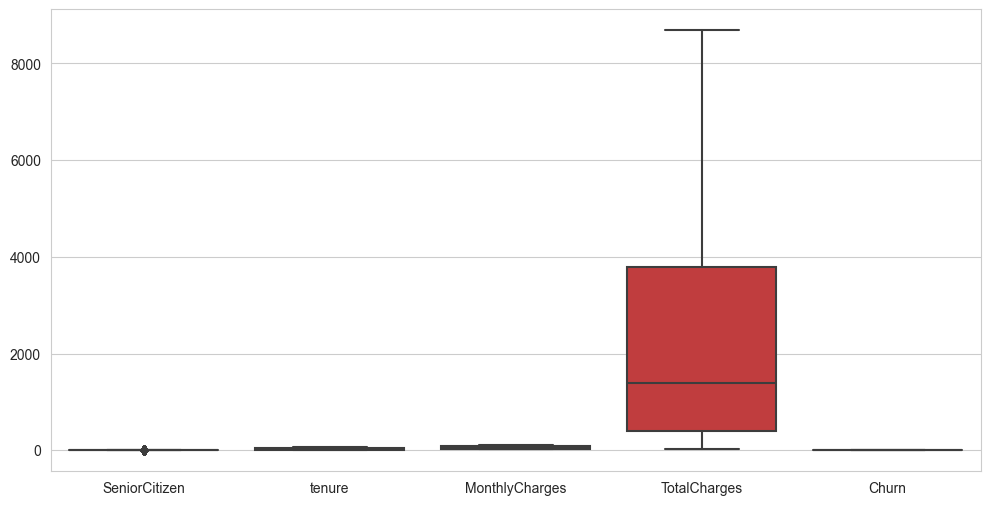

In [25]:
# Aykırı Değerleri Kontrol Etme
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(12, 6))
sns.boxplot(data=df, ax=ax)
plt.show()

In [26]:
def outlier_thresholds(dataframe, col_name, q1=0.25, q3=0.75):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit
outlier_thresholds(df, "TotalCharges")

(-4688.481250000001, 8884.66875)

In [27]:
#Aykırı değer var mı ? / varsa True döner.
def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

In [28]:
for col in num_cols:
    print(col, ": ", check_outlier(df, col))        # aykırı gözlem yok

tenure :  False
MonthlyCharges :  False
TotalCharges :  False


In [29]:
#Adım 6: Eksik gözlem var mı inceleyiniz.
df.isnull().sum() 

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [30]:
#Eksik Gözlem Analizi
def missing_values_table(dataframe, na_name=False):
    na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]

    n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False)
    ratio = (dataframe[na_columns].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)
    missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=['n_miss', 'ratio'])
    print(missing_df, end="\n")

    if na_name:
        return na_columns

In [31]:
missing_values_table(df)

              n_miss  ratio
TotalCharges      11   0.16


In [33]:
df["TotalCharges"].fillna(df["TotalCharges"].mean(), inplace=True) 

### Görev 2 : Feature Engineering
---

In [34]:
#Adım 1:  Eksik ve aykırı gözlemler için gerekli işlemleri yapınız.  - gerkli işlemleri yukarıdayaptık

# Adım 2: Yeni değişkenler oluşturunuz.
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [35]:
def fea_eng(df):
    df.loc[(df["tenure"]>=0) & (df["tenure"]<=12),"NEW_TENURE_YEAR"] = "0-1 Year"
    df.loc[(df["tenure"]>12) & (df["tenure"]<=24),"NEW_TENURE_YEAR"] = "1-2 Year"
    df.loc[(df["tenure"]>24) & (df["tenure"]<=36),"NEW_TENURE_YEAR"] = "2-3 Year"
    df.loc[(df["tenure"]>36) & (df["tenure"]<=48),"NEW_TENURE_YEAR"] = "3-4 Year"
    df.loc[(df["tenure"]>48) & (df["tenure"]<=60),"NEW_TENURE_YEAR"] = "4-5 Year"
    df.loc[(df["tenure"]>60) & (df["tenure"]<=72),"NEW_TENURE_YEAR"] = "5-6 Year"
    
    df["NEW_Engaged"] = df["Contract"].apply(lambda x: 1 if x in ["One year","Two year"] else 0)
    df["NEW_noProt"] = df.apply(lambda x: 1 if (x["OnlineBackup"] != "Yes") or (x["DeviceProtection"] != "Yes") or (x["TechSupport" ] != "Yes") else 0, axis=1) 
    df["NEW_Young_Not_Engaged"] = df.apply(lambda x: 1 if (x["NEW_Engaged"] == 0) and (x["SeniorCitizen"] == 0) else 0, axis=1)
    df['NEW_TotalServices'] = (df[['PhoneService', 'InternetService', 'OnlineSecurity',
                                        'OnlineBackup', 'DeviceProtection', 'TechSupport',
                                        'StreamingTV', 'StreamingMovies']]== 'Yes').sum(axis=1)
    df["NEW_FLAG_ANY_STREAMING"] = df.apply(lambda x: 1 if (x["StreamingTV"] == "Yes") or (x["StreamingMovies"] == "Yes") else 0, axis=1)
    df["NEW_FLAG_AutoPayment"] = df["PaymentMethod"].apply(lambda x: 1 if x in ["Bank transfer (automatic)","Credit card (automatic)"] else 0)  
    df["NEW_AVG_Charges"] = df["TotalCharges"] / (df["tenure"] + 1)
    df["NEW_Increase"] = df["NEW_AVG_Charges"] / df["MonthlyCharges"]
    df["NEW_AVG_Service_Fee"] = df["MonthlyCharges"] / (df['NEW_TotalServices'] + 1)
    return df

In [36]:
df = fea_eng(df)

In [37]:
df.columns = [col.upper() for col in df.columns]
df.head()

,CUSTOMERID,GENDER,SENIORCITIZEN,PARTNER,DEPENDENTS,TENURE,PHONESERVICE,MULTIPLELINES,INTERNETSERVICE,ONLINESECURITY,ONLINEBACKUP,DEVICEPROTECTION,TECHSUPPORT,STREAMINGTV,STREAMINGMOVIES,CONTRACT,PAPERLESSBILLING,PAYMENTMETHOD,MONTHLYCHARGES,TOTALCHARGES,CHURN,NEW_TENURE_YEAR,NEW_ENGAGED,NEW_NOPROT,NEW_YOUNG_NOT_ENGAGED,NEW_TOTALSERVICES,NEW_FLAG_ANY_STREAMING,NEW_FLAG_AUTOPAYMENT,NEW_AVG_CHARGES,NEW_INCREASE,NEW_AVG_SERVICE_FEE
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,0-1 Year,0,1,1,1,0,0,14.925000,0.500000,14.9250
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,2-3 Year,1,1,0,3,0,0,53.985714,0.947949,14.2375
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,0-1 Year,0,1,1,3,0,0,36.050000,0.669452,13.4625
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,3-4 Year,1,1,0,3,0,1,40.016304,0.946012,10.5750
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,0-1 Year,0,1,1,1,0,0,50.550000,0.714993,35.3500


In [38]:
# Feature Engineering Sonrası Değişken Tutma İşlemini Tekrarlamalıyız
def grab_col_names(dataframe, cat_th=10, car_th=20):


    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}") #tuple'ın ilk elemanı olan satır sayısını belirtir.
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')
    return cat_cols, num_cols, cat_but_car

cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 7043
Variables: 31
cat_cols: 24
num_cols: 6
cat_but_car: 1
num_but_cat: 8


In [39]:
#Adım 3:  Encoding işlemlerini gerçekleştiriniz.

def label_encoder(df, binary_col):
    labelencoder = LabelEncoder()
    df[binary_col] = labelencoder.fit_transform(df[binary_col])
    return df
"""Label Encoding: Kategorik değişkenlerin, sıralı olarak sayısal değerlere dönüştürülmesi işlemidir. Bu yöntem, sıralı kategorik değişkenlerde kullanılır.
 Örneğin, XS, S, M, L, XL gibi beden ölçüleri sıralı bir yapıya sahiptir ve Label Encoding yöntemi ile sayısal değerlere dönüştürülebilir."""


'Label Encoding: Kategorik değişkenlerin, sıralı olarak sayısal değerlere dönüştürülmesi işlemidir. Bu yöntem, sıralı kategorik değişkenlerde kullanılır.\n Örneğin, XS, S, M, L, XL gibi beden ölçüleri sıralı bir yapıya sahiptir ve Label Encoding yöntemi ile sayısal değerlere dönüştürülebilir.'

In [40]:
binary_cols = [col for col in df.columns if df[col].dtypes == "O" and df[col].nunique() == 2]
binary_cols

['GENDER', 'PARTNER', 'DEPENDENTS', 'PHONESERVICE', 'PAPERLESSBILLING']

In [41]:
for col in binary_cols:
    df = label_encoder(df, col)

df.head()

,CUSTOMERID,GENDER,SENIORCITIZEN,PARTNER,DEPENDENTS,TENURE,PHONESERVICE,MULTIPLELINES,INTERNETSERVICE,ONLINESECURITY,ONLINEBACKUP,DEVICEPROTECTION,TECHSUPPORT,STREAMINGTV,STREAMINGMOVIES,CONTRACT,PAPERLESSBILLING,PAYMENTMETHOD,MONTHLYCHARGES,TOTALCHARGES,CHURN,NEW_TENURE_YEAR,NEW_ENGAGED,NEW_NOPROT,NEW_YOUNG_NOT_ENGAGED,NEW_TOTALSERVICES,NEW_FLAG_ANY_STREAMING,NEW_FLAG_AUTOPAYMENT,NEW_AVG_CHARGES,NEW_INCREASE,NEW_AVG_SERVICE_FEE
0,7590-VHVEG,0,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0,0-1 Year,0,1,1,1,0,0,14.925000,0.500000,14.9250
1,5575-GNVDE,1,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0,2-3 Year,1,1,0,3,0,0,53.985714,0.947949,14.2375
2,3668-QPYBK,1,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1,0-1 Year,0,1,1,3,0,0,36.050000,0.669452,13.4625
3,7795-CFOCW,1,0,0,0,45,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0,3-4 Year,1,1,0,3,0,1,40.016304,0.946012,10.5750
4,9237-HQITU,0,0,0,0,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1,0-1 Year,0,1,1,1,0,0,50.550000,0.714993,35.3500


In [42]:
cat_cols = [col for col in cat_cols if col not in binary_cols and col not in ["Churn"]]
#"cat_cols" listesi yalnızca "binary_cols" ve "Churn" olmayan kategorik sütunları içeriyor.

In [43]:

#One-Hot Encoding  (Label Encoding çok sınıflı kategorik değişkenler için tercih edilen yöntem değildir.)
def one_hot_encoder(dataframe, categorical_cols, drop_first=False):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe

"""One-Hot Encoding yöntemi, kategorik değişkenlerin her bir farklı sınıfını bir sütun olarak alıp,
 sınıfın olup olmadığını 1 ve 0 ile ifade ederek yeni sütunlar ekler. 
 Böylece her bir sınıf bir sütunda tek başına temsil edilir. 
 Bu sayede kategorik değişkenler, makine öğrenmesi modellerinin anlayabileceği sayısal verilere dönüştürülmüş olur.
 
 Fonksiyonun argümanları şu şekildedir:

df: One-Hot Encoding işlemi yapılacak DataFrame.
categorical_cols: One-Hot Encoding işlemi yapılacak kategorik değişkenlerin isimlerinin yer aldığı liste.
drop_first: Dummy değişken tuzağından kaçınmak için ilk sütunun silinip silinmeyeceğini belirten bir boolean değer.
Varsayılan olarak False olarak ayarlanmıştır."""


'One-Hot Encoding yöntemi, kategorik değişkenlerin her bir farklı sınıfını bir sütun olarak alıp,\n sınıfın olup olmadığını 1 ve 0 ile ifade ederek yeni sütunlar ekler. \n Böylece her bir sınıf bir sütunda tek başına temsil edilir. \n Bu sayede kategorik değişkenler, makine öğrenmesi modellerinin anlayabileceği sayısal verilere dönüştürülmüş olur.\n \n Fonksiyonun argümanları şu şekildedir:\n\ndf: One-Hot Encoding işlemi yapılacak DataFrame.\ncategorical_cols: One-Hot Encoding işlemi yapılacak kategorik değişkenlerin isimlerinin yer aldığı liste.\ndrop_first: Dummy değişken tuzağından kaçınmak için ilk sütunun silinip silinmeyeceğini belirten bir boolean değer.\nVarsayılan olarak False olarak ayarlanmıştır.'

In [44]:
df = one_hot_encoder(df, cat_cols, drop_first=True)

**NOT: Dummy değişken tuzağı nedir?**

---

- Dummy değişken tuzağı, bir veya daha fazla kategorik değişkenin dummy değişkenleri oluşturulduğunda ortaya çıkabilen bir sorundur.
- Bu durumda, iki veya daha fazla dummy değişkeni arasında tam bir çoklu doğrusal ilişki vardır, yani bir değişkenin değeri diğerlerinin toplamı ile ifade edilebilir
- Bu, modelde çoklu doğrusal bağımlılığa neden olur ve sonuç olarak, modelin performansını düşürür. 
- Bu sorunu çözmek için, dummy değişkenlerinden birinin çıkarılması gerekmektedir. 
- Genellikle, bir kategorik değişken için "n" farklı değer varsa, n-1 dummy değişkeni oluşturulması önerilir. 
- Böylece, herhangi bir çoklu doğrusal ilişki engellenir ve modele dahil edilen tüm değişkenlerin etkisi yansıtılır.

**Standarlaştırma için RobustScaler kullanacağız**
- RobustScaler, verilerin ölçeğini dönüştürmek için kullanılan bir ölçekleme yöntemidir.
- Bu ölçekleme yöntemi, verilerin medyanını çıkarır ve ardından IQR'a (Interquartile Range) böler. 
- IQR, verilerin çeyrekliklerine (1. çeyreklik ve 3. çeyreklik) göre hesaplanan bir ölçüdür ve verilerin dağılımının merkezi 50%'lik bölümünü temsil eder.

---

- Aykırı değerler, veri setindeki diğer verilerden çok farklı olabilir ve genellikle verilerin ortalamasını veya standart sapmasını etkileyerek,
ölçekleme işlemi sırasında hatalı sonuçlar üretmelerine neden olabilir. 
- Bu nedenle, RobustScaler gibi aykırı değerlere karşı daha dirençli olan ölçekleme yöntemleri, verilerin daha doğru bir şekilde ölçeklendirilmesini sağlayabilir.

In [45]:
#Adım 4: Numerik değişkenler için standartlaştırma yapınız. 
# Aykırı Değerleri Kontrol Etme

def outlier_thresholds(dataframe, col_name, q1=0.25, q3=0.75):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

In [46]:
#Aykırı değer var mı ? / varsa True döner.
def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

In [47]:
for col in num_cols:
    print(col, ": ", check_outlier(df, col)) 

TENURE :  False
MONTHLYCHARGES :  False
TOTALCHARGES :  False
NEW_AVG_CHARGES :  True
NEW_INCREASE :  True
NEW_AVG_SERVICE_FEE :  True


In [48]:
rs = RobustScaler() # Medyanı çıkar iqr'a böl.
df[num_cols] = rs.fit_transform(df[num_cols])
df.describe().T
"""RobustScaler() ise, özelliklerin medyanı ve çeyrekler aralığına dayanarak ölçeklendirir. 
Bu ölçeklendirme yöntemi, veri setindeki özelliklerin normal bir dağılım göstermediği veya aykırı değerlere sahip olduğu durumlarda daha sağlam bir seçenektir."""

'RobustScaler() ise, özelliklerin medyanı ve çeyrekler aralığına dayanarak ölçeklendirir. \nBu ölçeklendirme yöntemi, veri setindeki özelliklerin normal bir dağılım göstermediği veya aykırı değerlere sahip olduğu durumlarda daha sağlam bir seçenektir.'

### Görev 3 : Modelleme
---

In [49]:
#Adım 1:  Sınıflandırma algoritmaları ile modeller kurup, accuracy skorlarını inceleyip. En iyi 4 modeli seçiniz.
#Adım 2: Seçtiğiniz modeller ile hiper parametre optimizasyonu gerçekleştirin ve bulduğunuz hipar parametrelerile modeli tekrar kurunuz.


**Sınıflandırma Algoritmaları nelerdir ?**

---

- **Karar Ağacı (Decision Tree) Algoritmaları**
- Destek Vektör Makinesi (SVM)
- **K-En Yakın Komşu (KNN)**
- Doğrusal Diskriminant Analizi (LDA)
- Yapay Sinir Ağı (Artificial Neural Network, ANN)
- **Lojistik Regresyon (Logistic Regression)**
- **Rastgele Orman (Random Forest)**
- Naif Bayes (Naive Bayes)
- Çok Katmanlı Algılama (Multilayer Perceptron, MLP)


In [51]:
X = df.drop(["CHURN_1","CUSTOMERID"], axis=1) # bağımsız değişkenler
y = df["CHURN_1"] # bağıml değişken

In [52]:
X_scaled = StandardScaler().fit_transform(X) # KNN modeli için Verileri ölçeklendirme / 

X = pd.DataFrame(X_scaled, columns=X.columns)
"""StandardScaler(), özellikleri ortalaması 0 ve standart sapması 1 olan bir Gauss dağılımı şeklinde ölçeklendirir.
 Bu ölçeklendirme yöntemi, veri setindeki özellikler normal bir dağılım gösterdiğinde oldukça etkilidir."""

'StandardScaler(), özellikleri ortalaması 0 ve standart sapması 1 olan bir Gauss dağılımı şeklinde ölçeklendirir.\n Bu ölçeklendirme yöntemi, veri setindeki özellikler normal bir dağılım gösterdiğinde oldukça etkilidir.'

In [53]:
################################################
# Modeling & Prediction - KNN
################################################
knn_model = KNeighborsClassifier().fit(X, y)

random_user = X.sample(1, random_state=45)

knn_model.predict(random_user) # 0 geldi.

array([0], dtype=uint8)

In [54]:
# Confusion matrix için y_pred:
y_pred = knn_model.predict(X)


In [55]:
# AUC için y_prob:
y_prob = knn_model.predict_proba(X)[:, 1]
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.91      0.89      5174
           1       0.71      0.65      0.68      1869

    accuracy                           0.84      7043
   macro avg       0.80      0.78      0.79      7043
weighted avg       0.83      0.84      0.84      7043



- Ana odağımız 1 olma durumu(Churn) Acc:%84 başarı Ancak acc herzaman doğru lmayabilir (dengesiz veri problemi varsa) diğer metriklere de bakmamız gerek
precision 1 olarak tahminlerin başarısıydı. 
- recall  gerçekte 1 olanları 1 olarak tahmin etme oranımız. Ancak recall %65 gibi görünüyor.
**f1-score  de bunların ortalaması olduğuna göre %68 gibi görünüyor.** Yani veri dengesiz gibi kabul edilirse başarı oranımız %68 gibi görünüyor diyebiliriz.

In [56]:
roc_auc_score(y, y_prob) # veri dengeli kabul edilirse başarımız %89.9

0.8991474948930768

In [57]:
################################################
#  Hyperparameter Optimization - KNN
################################################
"""HPO'nun amacı, modelin doğruluğunu artırmak veya kayıp fonksiyonunu minimize etmek gibi performans ölçütlerini iyileştirmektir.
 Bu nedenle, hiperparametrelerin doğru bir şekilde ayarlanması, modelin daha iyi sonuçlar vermesini sağlayabilir."""
knn_model = KNeighborsClassifier()
knn_model.get_params()

knn_params = {"n_neighbors": range(2, 50)}

knn_gs_best = GridSearchCV(knn_model,
                           knn_params,
                           cv=5,
                           n_jobs=-1,
                           verbose=1).fit(X, y) 

knn_gs_best.best_params_

# komşuluk sayısı 40

Fitting 5 folds for each of 48 candidates, totalling 240 fits


{'n_neighbors': 28}

In [58]:
################################################
#  Final Model - KNN
################################################

knn_final = knn_model.set_params(**knn_gs_best.best_params_).fit(X, y) 
#{'n_neighbors': 40} Normalde elle yazabilirdik ancak komşuluk çok olduğunda ** la otomatik atariz.

cv_results = cross_validate(knn_final,
                            X,
                            y,
                            cv=5,
                            scoring=["accuracy", "f1", "roc_auc"])

In [59]:
cv_results['test_accuracy'].mean()

0.7901469449641912

In [60]:
cv_results['test_f1'].mean()

0.5833519825788345

In [61]:
cv_results['test_roc_auc'].mean()

0.8250542931199742

In [62]:
################################################
# Modeling & Prediction - Logistic Regression
################################################

X = df.drop(["CHURN_1","CUSTOMERID"], axis=1) # bağımsız değişkenler
y = df["CHURN_1"] # bağımlı değişken
model = LogisticRegression(solver='lbfgs', max_iter=500)

log_model = model.fit(X, y)


In [63]:
log_model.intercept_# sabit

array([-1.42714203])

In [64]:
log_model.coef_ # diğer değişkenlerin ağırlıkları

array([[-0.0258676 ,  0.04599193, -0.13380598, -1.25381609, -0.30498991,
         0.34710937, -0.14437673, -0.19892106,  0.63800074, -0.3086872 ,
        -0.18029634,  0.28566865,  0.36986982,  0.94577667, -0.14961636,
        -0.14961636, -0.35482817, -0.14961636, -0.15114965, -0.14961636,
        -0.01165368, -0.14961636, -0.31128045, -0.14961636,  0.37747504,
        -0.14961636,  0.39226523, -0.01861266, -0.86879553, -0.07990409,
         0.20880381, -0.17804793, -0.06222601, -0.07454777,  0.33255825,
         0.4258182 ,  0.47031181,  0.00620357, -0.88740819,  0.04913175,
        -0.25765302,  0.26173325,  0.18149433, -0.03618615, -0.14409043,
        -0.01228694, -0.01596622, -0.02096162, -0.21557844, -0.05007713]])

In [65]:
y_pred = log_model.predict(X)

In [66]:
y_pred[0:10] # tahmin edilen ilk 10 gözleme bakalım 

array([1, 0, 0, 0, 1, 1, 0, 0, 1, 0], dtype=uint8)

In [67]:
y[0:10]# gerçek edilen ilk 10 gözleme bakalım

0    0
1    0
2    1
3    0
4    1
5    1
6    0
7    0
8    1
9    0
Name: CHURN_1, dtype: uint8

In [68]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.91      0.87      5174
           1       0.68      0.54      0.60      1869

    accuracy                           0.81      7043
   macro avg       0.76      0.72      0.74      7043
weighted avg       0.80      0.81      0.80      7043



In [69]:
# ROC AUC
y_prob = log_model.predict_proba(X)[:, 1]
roc_auc_score(y, y_prob)

0.8543109629722471

- Ana odağımız 1 olma durumu(Churn) Acc:%81 başarı Ancak acc herzaman doğru olmayabilir (dengesiz veri problemi varsa) diğer metriklere de bakmamız gerek
precision 1 olarak tahminlerin başarısıydı. 
- recall  gerçekte 1 olanları 1 olarak tahmin etme oranımız. Ancak recall %54 gibi görünüyor.
**f1-score  de bunların ortalaması olduğuna göre %60 gibi görünüyor.** 

In [72]:
################################################
#  Hyperparameter Optimization - Logistic Regression
################################################
model_2 = LogisticRegression(solver='lbfgs', max_iter=500)
model_2.get_params()

model_2_params = {
    "penalty": ["l1", "l2"],
    "C": [0.01, 0.1, 1, 10],
    "solver": ["liblinear", "saga"]
}

model_2_gs_best = GridSearchCV(model_2,
                           model_2_params,
                           cv=5,
                           n_jobs=-1,
                           verbose=1).fit(X, y) 

model_2_gs_best.best_params_
#{'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}

Fitting 5 folds for each of 16 candidates, totalling 80 fits


{'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}

In [73]:
################################################
#  Final Model -Logistic Regression
################################################
model_2_final = model_2.set_params(**model_2_gs_best.best_params_).fit(X, y) 

cv_results = cross_validate(model_2_final,
                            X,
                            y,
                            cv=5,
                            scoring=["accuracy", "f1", "roc_auc"])

In [74]:
cv_results['test_accuracy'].mean()

0.8066172615975222

In [75]:
cv_results['test_f1'].mean()

0.5912457120411887

In [76]:
cv_results['test_roc_auc'].mean()

0.8495635258564814

In [77]:
################################################
# Modeling using CART
################################################
X = df.drop(["CHURN_1","CUSTOMERID"], axis=1) # bağımsız değişkenler
y = df["CHURN_1"] # bağımlı değişken
cart_model = DecisionTreeClassifier(random_state=1).fit(X, y)

In [78]:
# Confusion matrix için y_pred:
y_pred = cart_model.predict(X)

In [79]:
# AUC için y_prob:
y_prob = cart_model.predict_proba(X)[:, 1]

In [80]:
# Confusion matrix
print(classification_report(y, y_pred)) # bukara iyi olması sorun olabilir.aşırı öğrenme olabilir. 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5174
           1       1.00      0.99      1.00      1869

    accuracy                           1.00      7043
   macro avg       1.00      1.00      1.00      7043
weighted avg       1.00      1.00      1.00      7043



In [81]:
#Model doğrulama ihtiyacımız var
#####################
# Holdout Yöntemi ile Başarı Değerlendirme
#####################

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=45)

cart_model = DecisionTreeClassifier(random_state=17).fit(X_train, y_train)

# Train Hatası
y_pred = cart_model.predict(X_train)
y_prob = cart_model.predict_proba(X_train)[:, 1]
print(classification_report(y_train, y_pred))
roc_auc_score(y_train, y_prob)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3601
           1       1.00      0.99      1.00      1329

    accuracy                           1.00      4930
   macro avg       1.00      1.00      1.00      4930
weighted avg       1.00      1.00      1.00      4930



0.9999943582263017

In [82]:
# Test Hatası
y_pred = cart_model.predict(X_test)
y_prob = cart_model.predict_proba(X_test)[:, 1]
print(classification_report(y_test, y_pred))
roc_auc_score(y_test, y_prob)           # bu sefer de test hatası çok düştü

              precision    recall  f1-score   support

           0       0.82      0.79      0.81      1573
           1       0.46      0.51      0.48       540

    accuracy                           0.72      2113
   macro avg       0.64      0.65      0.64      2113
weighted avg       0.73      0.72      0.72      2113



0.6503761390125027

- Model eğitildiği veride performansını çok yüksek gösterdi. Ancak görmediği bir veriyi sorduğumuzda değerler neredeyse yarı yarıya fark etti.
- (zaten testin hatasının eğitim hatasına göre daha düşük olmasını bekleriz.) Ancak burada olağın üstü fark var.

In [83]:

# 5 katlı çapraz doğrulama yaptık - bu hatalar en doğru hatalardır..
cart_model = DecisionTreeClassifier(random_state=17).fit(X, y)

cv_results = cross_validate(cart_model,
                            X, y,
                            cv=5,
                            scoring=["accuracy", "f1", "roc_auc"])

In [84]:
cv_results['test_accuracy'].mean()

0.7275314133169882

In [85]:
cv_results['test_f1'].mean()

0.49173259397615326

In [86]:
cv_results['test_roc_auc'].mean()

0.6544447394817843

In [87]:
################################################
#  Hyperparameter Optimization -  CART
################################################
cart_model = DecisionTreeClassifier(random_state=1)

cart_model_params = {
    "max_depth": [2, 5, 10, 20],
    "min_samples_split": [2, 5, 10, 20],
    "min_samples_leaf": [1, 2, 4, 8]
}

cart_model_gs_best = GridSearchCV(cart_model,
                                  cart_model_params,
                                  cv=5,
                                  n_jobs=-1,
                                  verbose=1).fit(X, y)

cart_model_gs_best.best_params_

Fitting 5 folds for each of 64 candidates, totalling 320 fits


{'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}

In [88]:
################################################
#  Final Model -CART
################################################
cart_model_final = cart_model.set_params(**cart_model_gs_best.best_params_).fit(X, y) 

cv_results = cross_validate(cart_model_final,
                            X,
                            y,
                            cv=5,
                            scoring=["accuracy", "f1", "roc_auc"])

In [89]:
cv_results['test_accuracy'].mean()

0.7782197641783342

In [90]:
cv_results['test_f1'].mean()

0.5708289632619031

In [91]:
cv_results['test_roc_auc'].mean()

0.8205657902088532

In [109]:
################################################
# Random Forests
################################################
X = df.drop(["CHURN_1","CUSTOMERID"], axis=1) # bağımsız değişkenler
y = df["CHURN_1"] # bağımlı değişken
rf_model = RandomForestClassifier(random_state=17)
rf_model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 17,
 'verbose': 0,
 'warm_start': False}

In [111]:
cv_results = cross_validate(rf_model, X, y, cv=10, scoring=["accuracy", "f1", "roc_auc"])

In [112]:
cv_results['test_accuracy'].mean()

0.7924139667956157

In [113]:
cv_results['test_f1'].mean()

0.5600702520455203

In [114]:
cv_results['test_roc_auc'].mean()

0.8271052997634796

In [118]:
################################################
# 4. Hyperparameter Optimization with GridSearchCV
################################################

rf_model.get_params()

rf_params = {"max_depth": [5, 8, None],
             "max_features": [3, 5, 7, "auto"],
             "min_samples_split": [2, 5, 8, 15, 20],
             "n_estimators": [100, 200, 500]}

rf_best_grid = GridSearchCV(rf_model, rf_params,
                             cv=5,
                             n_jobs=-1,
                             verbose=True).fit(X, y)

rf_best_grid.best_params_


#180 kombinasyon var  900 fit etme işlemi gerçekleşmiş.

Fitting 5 folds for each of 180 candidates, totalling 900 fits


{'max_depth': 8,
 'max_features': 5,
 'min_samples_split': 2,
 'n_estimators': 200}

In [119]:

################################################
# 5. Final Model
################################################

rf_final = rf_model.set_params(**rf_best_grid.best_params_, random_state=17).fit(X, y)

cv_results = cross_validate(rf_final, X, y, cv=10, scoring=["accuracy", "f1", "roc_auc"])


In [120]:
cv_results['test_accuracy'].mean()

0.7993709703417149

In [121]:
cv_results['test_f1'].mean()

0.5631904661215884

In [122]:
cv_results['test_roc_auc'].mean()

0.8451890448223842

- **KNN final :** acc 79, f1 58, auc 82
- **logistic regression final :** acc 80,f1 59,auc 84
- **CART final:** acc 77,f1 57,auc 82
- **Random Forests final:** acc 79,f1 56,auc 84

**En yüksek AUC değerine sahip olan logistic regression modeli en iyi performansı gösteriyor.**

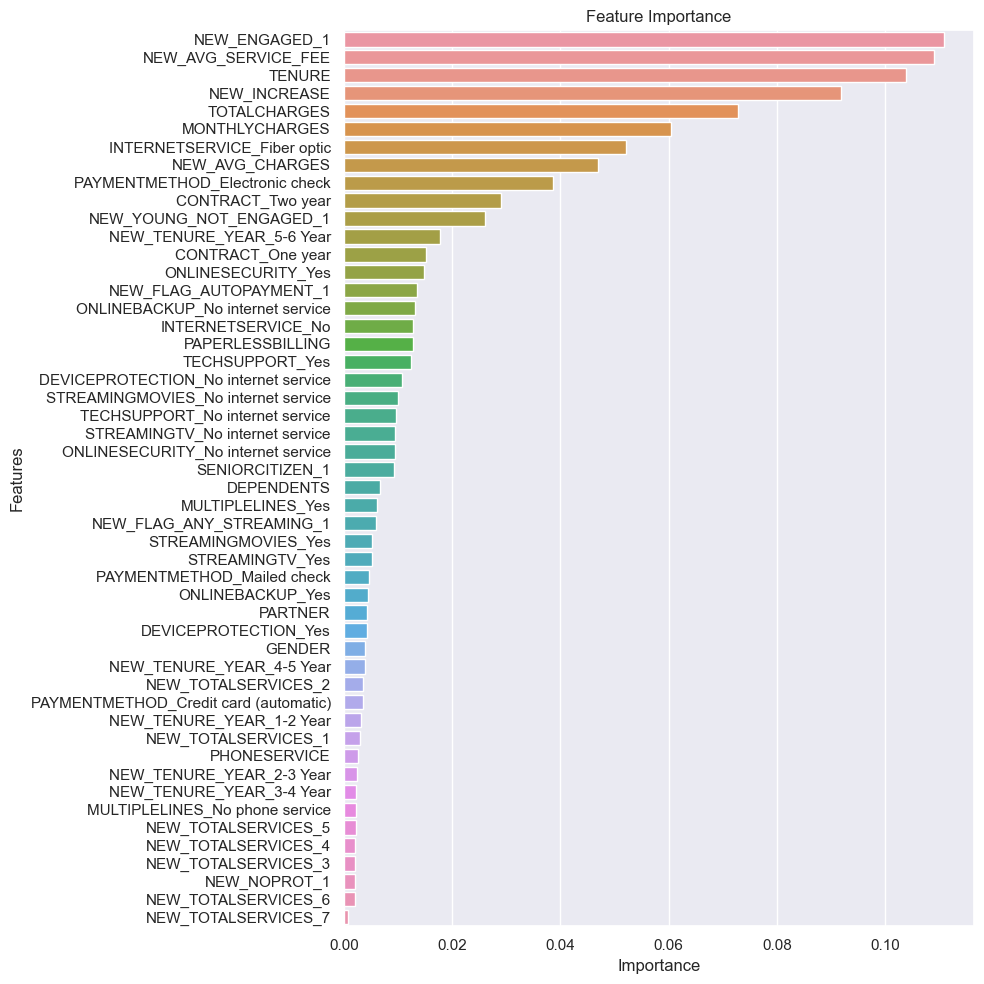

In [133]:
# yeni değişkenlerimizin önem düzeyi

def plot_importance(model, features, num=len(X), save=False):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns}).sort_values(by="Value", ascending=False)
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp[0:num])
    plt.title('Feature Importance')
    plt.xlabel('Importance')
    plt.ylabel('Features')
    plt.tight_layout()
    plt.show()
    if save:
        plt.savefig('importances.png')

plot_importance(rf_best_grid.best_estimator_, X_train, num=50)

